# Deep Learning at Neuromatch 2021
## Week 1, Day 1: Basics of Pytorch
I was not able to attend Neuromatch 2021, but I worked through the tutorials to better understand Deep Learning

#### Section 2.1: Making Tensors

In [1]:
!pip install git+https://github.com/NeuromatchAcademy/evaltools --quiet

from evaltools.airtable import AirtableForm

In [36]:
# Imports
import time
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [3]:
# @title Helper Functions

atform = AirtableForm('appn7VdPRseSoMXEG','W1D1_T1','https://portal.neuromatchacademy.org/api/redirect/to/97e94a29-0b3a-4e16-9a8d-f6838a5bd83d')


def checkExercise1(A, B, C, D):
  """
  Helper function for checking exercise.

  Args:
    A: torch.Tensor
    B: torch.Tensor
    C: torch.Tensor
    D: torch.Tensor
  Returns:
    Nothing.
  """
  errors = []
  # TODO better errors and error handling
  if not torch.equal(A.to(int),torch.ones(20, 21).to(int)):
    errors.append(f"Got: {A} \n Expected: {torch.ones(20, 21)} (shape: {torch.ones(20, 21).shape})")
  if not np.array_equal( B.numpy(),np.vander([1, 2, 3], 4)):
    errors.append("B is not a tensor containing the elements of Z ")
  if C.shape != (20, 21):
    errors.append("C is not the correct shape ")
  if not torch.equal(D, torch.arange(4, 41, step=2)):
    errors.append("D does not contain the correct elements")

  if errors == []:
    print("All correct!")

  else:
    [print(e) for e in errors]


def timeFun(f, dim, iterations, device='cpu'):
  iterations = iterations
  t_total = 0
  for _ in range(iterations):
    start = time.time()
    f(dim, device)
    end = time.time()
    t_total += end - start

  if device == 'cpu':
    print(f"time taken for {iterations} iterations of {f.__name__}({dim}, {device}): {t_total:.5f}")
  else:
    print(f"time taken for {iterations} iterations of {f.__name__}({dim}, {device}): {t_total:.5f}")


##### Constructing tensors from lists, tuples and arrays

In [20]:
from_list = torch.tensor([0,1,2]);
from_tuple = torch.tensor(((0,1),(1,2)));
from_array = torch.tensor(np.ones(shape=(5,)))
# from_text = torch.tensor(['text']) # strings don't work

print('Making tensors from data types')
print(from_list)
print(from_tuple)
print(from_array)

print('\n\nMaking tensors directly')
tensor_array = torch.ones([2,5]);
tensor_empty = torch.empty([2,5])
print(tensor_array)
print(tensor_empty)

print('\n\nMaking random tensors');
tensor_randu = torch.rand([5,])
tensor_randn = torch.randn([5,])
print(tensor_randu)
print(tensor_randn)

Making tensors from data types
tensor([0, 1, 2])
tensor([[0, 1],
        [1, 2]])
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Making tensors directly
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[ 0.0000e+00,  2.5244e-29, -2.1964e-37, -1.5849e+29,  1.1210e-44],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])


Making random tensors
tensor([0.5273, 0.2334, 0.7807, 0.6023, 0.1167])
tensor([-2.3272, -0.1689, -0.1354, -0.3584,  0.9301])


In [23]:
''' Set seed for reproducibility
'''
seed = 0;
np.random.seed(seed);
random.seed(seed)

# Need extra steps to set seed for torch
torch.manual_seed(seed);
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True



Create the following tensors:

𝐴:  20 by 21 tensor consisting of ones

𝐵: a tensor with elements equal to the elements of numpy array 𝑍

𝐶: a tensor with the same number of elements as 𝐴 but with values ∼𝑈(0,1)

𝐷: a 1D tensor containing the even numbers between 4 and 40 inclusive.

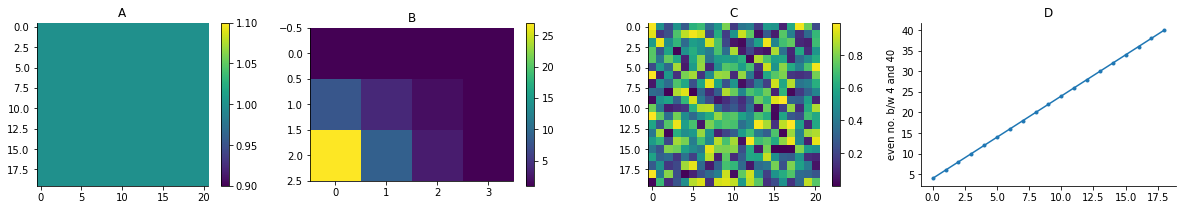

In [39]:
Z = np.vander([1, 2, 3], 4)
A = torch.ones([20,21]); #print(A)
B = torch.tensor(Z); #print(B)
C = torch.rand(A.size()); #print(C)
D = torch.arange(4, 41, step=2); #print(D)

f,ax = plt.subplots(1,4,figsize=(21,3));
pos = ax[0].imshow(A); ax[0].set_title('A'); f.colorbar(pos,ax=ax[0])
pos = ax[1].imshow(B); ax[1].set_title('B'); f.colorbar(pos,ax=ax[1])
pos = ax[2].imshow(C); ax[2].set_title('C'); f.colorbar(pos,ax=ax[2])
ax[3].plot(D,'.-'); sns.despine(); ax[3].set_ylabel('even no. b/w 4 and 40');
ax[3].set_title('D')

plt.show();